Question 8 -
Using the data from Question 5, write code the analyze the data and answer the following questions Note -
1. Draw plots to demonstrate the analysis for the following questions and better visualizations
2. Write code comments wherever required for code understanding

Insights to be drawn -

● Get all the overall ratings for each season and using plots compare the ratings for all the
seasons, like season 1 ratings, season 2, and so on.

● Get all the episode names, whose average rating is more than 8 for every season

● Get all the episode names that aired before May 2019

● Get the episode name from each season with the highest and lowest rating

● Get the summary for the most popular ( ratings ) episode in every season

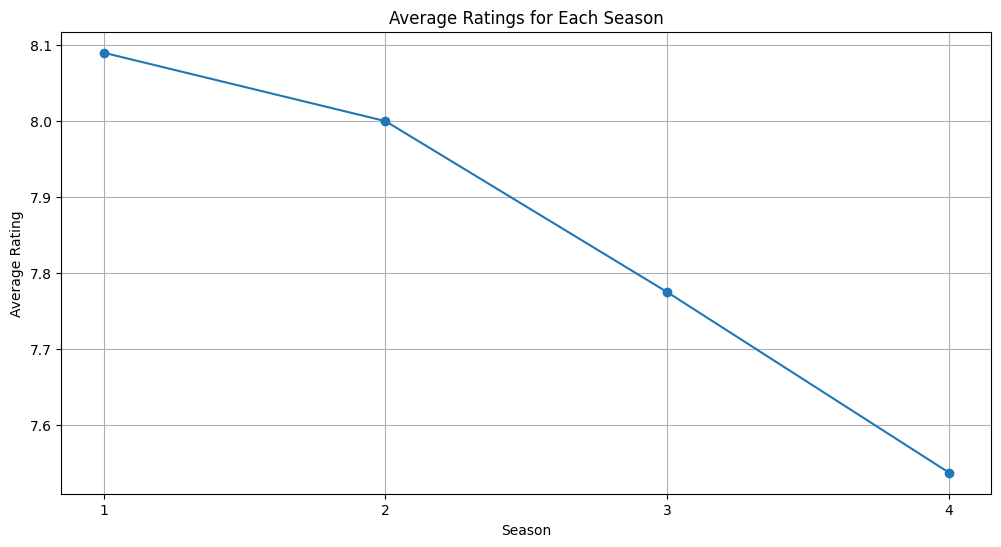

Season Ratings:
season
1    8.0900
2    8.0000
3    7.7750
4    7.5375
Name: rating, dtype: float64

High-Rated Episodes:
    season                       name
6        1              Trompe L'Oeil
8        1  The Well-Tempered Clavier
9        1         The Bicameral Mind
17       2                    Kiksuya
18       2            Vanishing Point
19       2              The Passenger

Episodes Aired Before May 2019:
    season                       name
0        1               The Original
1        1                   Chestnut
2        1                  The Stray
3        1          Dissonance Theory
4        1                Contrapasso
5        1              The Adversary
6        1              Trompe L'Oeil
7        1                Trace Decay
8        1  The Well-Tempered Clavier
9        1         The Bicameral Mind
10       2         Journey Into Night
11       2                    Reunion
12       2            Virtù e Fortuna
13       2   The Riddle of the Sphinx
14       

In [24]:
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt

def download_data(url):
    response = requests.get(url)  # Send a GET request to the URL
    data = response.json()  # Get the JSON data from the response
    return data

def convert_to_dataframe(data):
    # Create a DataFrame from the data
    df = pd.DataFrame(data)
    return df

def analyze_data(df):
    # Get all the overall ratings for each season
    extract_values = lambda x: list(x.values())[0]

    # Apply the lambda function to the 'column_name' column
    df['rating'] = df['rating'].apply(extract_values)

    season_ratings = df.groupby('season')['rating'].mean()
    
    # Get all the episode names with average rating > 8 for every season
    high_rated_episodes = df[df['rating'] > 8][['season', 'name']]
    
    # Get all the episode names that aired before May 2019
    episodes_before_may_2019 = df[df['airdate'] < '2019-05'][['season', 'name']]
    
    # Get the episode with the highest and lowest rating for each season
    highest_rating_episodes = df.groupby('season').apply(lambda x: x.loc[x['rating'].idxmax()])
    lowest_rating_episodes = df.groupby('season').apply(lambda x: x.loc[x['rating'].idxmin()])
    
    # Get the summary for the most popular episode (highest rating) in every season
    popular_episodes_summary = df.groupby('season').apply(lambda x: x.loc[x['rating'].idxmax()]['summary'])
    
    return season_ratings, high_rated_episodes, episodes_before_may_2019, highest_rating_episodes, lowest_rating_episodes, popular_episodes_summary

def plot_analysis(season_ratings):
    # Plotting the ratings for each season
    plt.figure(figsize=(12, 6))
    plt.plot(season_ratings.index, season_ratings.values, marker='o')
    plt.xlabel('Season')
    plt.ylabel('Average Rating')
    plt.title('Average Ratings for Each Season')
    plt.xticks(season_ratings.index)
    plt.grid(True)
    plt.show()

# Provide the URL of the data
url = "http://api.tvmaze.com/singlesearch/shows?q=westworld&embed=episodes"

# Download the data
data = download_data(url)

# Convert the data into a DataFrame
df = convert_to_dataframe(data['_embedded']['episodes'])

# Analyze the data
season_ratings, high_rated_episodes, episodes_before_may_2019, highest_rating_episodes, lowest_rating_episodes, popular_episodes_summary = analyze_data(df)

# Plot the ratings for each season
plot_analysis(season_ratings)

# Print the results
print("Season Ratings:")
print(season_ratings)
print("\nHigh-Rated Episodes:")
print(high_rated_episodes)
print("\nEpisodes Aired Before May 2019:")
print(episodes_before_may_2019)
print("\nEpisodes with Highest Rating per Season:")
print(highest_rating_episodes[['season', 'name', 'rating']])
print("\nEpisodes with Lowest Rating per Season:")
print(lowest_rating_episodes[['season', 'name', 'rating']])
print("\nSummary of Most Popular Episodes per Season:")
print(popular_episodes_summary)


In [22]:
df.head()

,id,url,name,season,number,type,airdate,airtime,airstamp,runtime,rating,image,summary,_links
0,869671,https://www.tvmaze.com/episodes/869671/westwor...,The Original,1,1,regular,2016-10-02,21:00,2016-10-03T01:00:00+00:00,68,{'average': 8},{'medium': 'https://static.tvmaze.com/uploads/...,<p>A woman named Dolores is a free spirit in t...,{'self': {'href': 'https://api.tvmaze.com/epis...
1,911201,https://www.tvmaze.com/episodes/911201/westwor...,Chestnut,1,2,regular,2016-10-09,21:00,2016-10-10T01:00:00+00:00,60,{'average': 7.7},{'medium': 'https://static.tvmaze.com/uploads/...,<p>Bernard suspects that someone is sabotaging...,{'self': {'href': 'https://api.tvmaze.com/epis...
2,911204,https://www.tvmaze.com/episodes/911204/westwor...,The Stray,1,3,regular,2016-10-16,21:00,2016-10-17T01:00:00+00:00,60,{'average': 7.6},{'medium': 'https://static.tvmaze.com/uploads/...,<p>Bernard continues to investigate Dolores' s...,{'self': {'href': 'https://api.tvmaze.com/epis...
3,911205,https://www.tvmaze.com/episodes/911205/westwor...,Dissonance Theory,1,4,regular,2016-10-23,21:00,2016-10-24T01:00:00+00:00,60,{'average': 7.9},{'medium': 'https://static.tvmaze.com/uploads/...,<p>While Dolores joins William and Logan on th...,{'self': {'href': 'https://api.tvmaze.com/epis...
4,927174,https://www.tvmaze.com/episodes/927174/westwor...,Contrapasso,1,5,regular,2016-10-30,21:00,2016-10-31T01:00:00+00:00,60,{'average': 8},{'medium': 'https://static.tvmaze.com/uploads/...,<p>Dolores takes the first step on her path of...,{'self': {'href': 'https://api.tvmaze.com/epis...


In [21]:
type(df['rating'][0])

dict

In [7]:
sr = df.groupby('season')['rating']